In [1]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from citipy import citipy
from datetime import datetime
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2f65df95df2a32f60e3fb1a5e3604bb


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # print(f"{i} {city}")
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | sorong
Processing Record 4 of Set 1 | rio grande
Processing Record 5 of Set 1 | tiznit
Processing Record 6 of Set 1 | temyasovo
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | riyadh
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | xining
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | lixourion
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | tsimlyansk
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | pochutla
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | faanui
Processing Record 24 of Set 1 | bethel
Processing R

Processing Record 39 of Set 4 | chino valley
Processing Record 40 of Set 4 | wattegama
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | pyapon
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | inhambane
Processing Record 46 of Set 4 | yinchuan
Processing Record 47 of Set 4 | okitipupa
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | two hills
Processing Record 2 of Set 5 | mizque
Processing Record 3 of Set 5 | cervo
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | mataura
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | machali
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 10 of Set 5 | mount gambier
Processing Record 11 of Set 5 | bredasdorp
Pr

Processing Record 22 of Set 8 | isangel
Processing Record 23 of Set 8 | gazojak
Processing Record 24 of Set 8 | long xuyen
Processing Record 25 of Set 8 | puerto leguizamo
Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | clarence town
Processing Record 28 of Set 8 | kadur
Processing Record 29 of Set 8 | dingle
Processing Record 30 of Set 8 | mawlaik
Processing Record 31 of Set 8 | bogdanovich
Processing Record 32 of Set 8 | narsaq
Processing Record 33 of Set 8 | am timan
Processing Record 34 of Set 8 | vicente guerrero
Processing Record 35 of Set 8 | sambava
Processing Record 36 of Set 8 | provideniya
Processing Record 37 of Set 8 | kaeo
Processing Record 38 of Set 8 | luanda
Processing Record 39 of Set 8 | sulangan
Processing Record 40 of Set 8 | rosetta
Processing Record 41 of Set 8 | gurupi
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | tomari
Processing Record 44 of Set 8 | arteche
Processing Record 45 of Set 8 | inhambupe
Pr

Processing Record 15 of Set 12 | mbandaka
Processing Record 16 of Set 12 | bhadra
Processing Record 17 of Set 12 | mvuma
Processing Record 18 of Set 12 | reconquista
Processing Record 19 of Set 12 | syracuse
Processing Record 20 of Set 12 | yerbogachen
Processing Record 21 of Set 12 | kyzyl-suu
Processing Record 22 of Set 12 | vilkaviskis
Processing Record 23 of Set 12 | belize
Processing Record 24 of Set 12 | russell
Processing Record 25 of Set 12 | zanjan
Processing Record 26 of Set 12 | codajas
Processing Record 27 of Set 12 | akdepe
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | kita
Processing Record 30 of Set 12 | lufilufi
Processing Record 31 of Set 12 | montague
Processing Record 32 of Set 12 | elkhart
Processing Record 33 of Set 12 | silago
Processing Record 34 of Set 12 | ciudad bolivar
Processing Record 35 of Set 12 | komsomolets
Processing Record 36 of Set 12 | morogoro
Processing Record 37 of Set 12 | farafangana
Processing Record 38 of Set 12 | vi

In [8]:
print(f"len of city_data: {len(city_data)}")

len of city_data: 572


In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,74.64,32,11,7.36,RU,2020-06-17 21:53:35
1,Georgetown,5.41,100.34,78.80,88,40,8.05,MY,2020-06-17 21:50:59
2,Sorong,-0.88,131.25,77.77,88,31,9.55,ID,2020-06-17 21:55:38
3,Rio Grande,-32.03,-52.10,66.00,86,96,4.00,BR,2020-06-17 21:55:38
4,Tiznit,29.58,-9.50,66.96,55,18,3.89,MA,2020-06-17 21:52:44


In [29]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-06-17 21:53:35,70.63,147.92,74.64,32,11,7.36
1,Georgetown,MY,2020-06-17 21:50:59,5.41,100.34,78.80,88,40,8.05
2,Sorong,ID,2020-06-17 21:55:38,-0.88,131.25,77.77,88,31,9.55
3,Rio Grande,BR,2020-06-17 21:55:38,-32.03,-52.10,66.00,86,96,4.00
4,Tiznit,MA,2020-06-17 21:52:44,29.58,-9.50,66.96,55,18,3.89


In [30]:
# Create the output file (CSV).
output_data_file  = os.path.join(".","weather_data", "cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds.
today = time.time()
today

1592431074.5781186

In [14]:
today = time.strftime('%x')
today

'06/17/20'

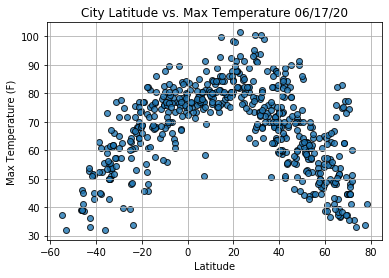

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig1.png")
plt.savefig(file_name)

# Show plot.
plt.show()

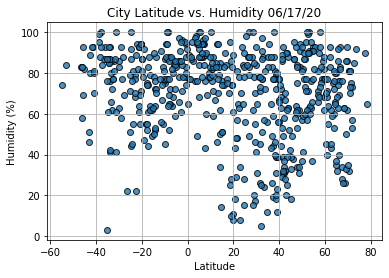

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig2.png")
plt.savefig(file_name)

# Show plot.
plt.show()

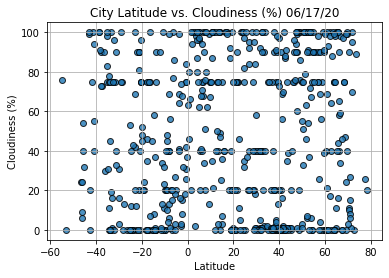

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
file_name = os.path.join(".", "weather_data", "Fig3.png")
plt.savefig(file_name)
# Show plot.
plt.show()

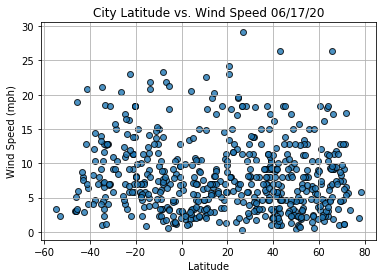

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig4.png")
plt.savefig(file_name)
# Show plot.
plt.show()

In [57]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value:{r_value}")
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2020-06-17 21:51:29
Lat                         22.29
Lng                        114.16
Max Temp                       82
Humidity                       78
Cloudiness                     11
Wind Speed                   5.99
Name: 13, dtype: object

In [31]:
city_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        572 non-null    object 
 1   Country     572 non-null    object 
 2   Date        572 non-null    object 
 3   Lat         572 non-null    float64
 4   Lng         572 non-null    float64
 5   Max Temp    572 non-null    float64
 6   Humidity    572 non-null    int64  
 7   Cloudiness  572 non-null    int64  
 8   Wind Speed  572 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.3+ KB


In [32]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-06-17 21:53:35,70.63,147.92,74.64,32,11,7.36
1,Georgetown,MY,2020-06-17 21:50:59,5.41,100.34,78.80,88,40,8.05
2,Sorong,ID,2020-06-17 21:55:38,-0.88,131.25,77.77,88,31,9.55
3,Rio Grande,BR,2020-06-17 21:55:38,-32.03,-52.10,66.00,86,96,4.00
4,Tiznit,MA,2020-06-17 21:52:44,29.58,-9.50,66.96,55,18,3.89


In [33]:
city_data_df.index.name = 'City_ID'
city_data_df = city_data_df.reset_index()
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2020-06-17 21:53:35,70.63,147.92,74.64,32,11,7.36
1,1,Georgetown,MY,2020-06-17 21:50:59,5.41,100.34,78.80,88,40,8.05
2,2,Sorong,ID,2020-06-17 21:55:38,-0.88,131.25,77.77,88,31,9.55
3,3,Rio Grande,BR,2020-06-17 21:55:38,-32.03,-52.10,66.00,86,96,4.00
4,4,Tiznit,MA,2020-06-17 21:52:44,29.58,-9.50,66.96,55,18,3.89


In [34]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                     Victoria
Country                        HK
Date          2020-06-17 21:51:29
Lat                         22.29
Lng                        114.16
Max Temp                       82
Humidity                       78
Cloudiness                     11
Wind Speed                   5.99
Name: 13, dtype: object

In [37]:
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
567     True
568    False
569     True
570    False
571    False
Name: Lat, Length: 572, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2020-06-17 21:53:35,70.63,147.92,74.64,32,11,7.36
1,1,Georgetown,MY,2020-06-17 21:50:59,5.41,100.34,78.80,88,40,8.05
4,4,Tiznit,MA,2020-06-17 21:52:44,29.58,-9.50,66.96,55,18,3.89
5,5,Temyasovo,RU,2020-06-17 21:55:39,52.99,58.10,60.80,63,37,11.18
6,6,Jamestown,US,2020-06-17 21:52:58,42.10,-79.24,78.80,34,1,3.36


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r-value:-0.6929961683339092


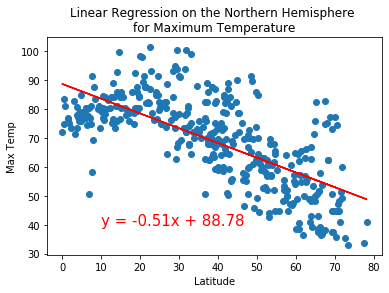

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(10,40))

r-value:0.7647003111789212


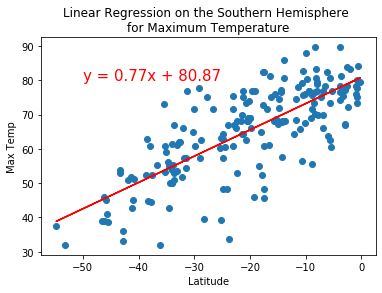

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50, 80))

r-value:-0.10957994525784362


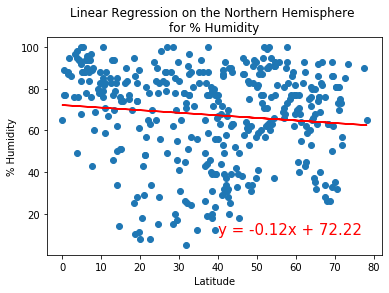

In [60]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(40,10))

r-value:0.02994463479646993


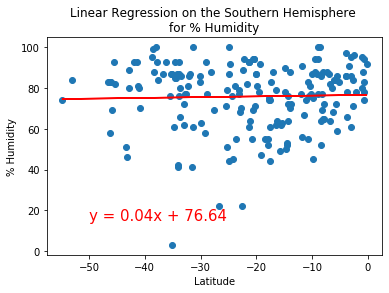

In [61]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

r-value:-0.08315432854068923


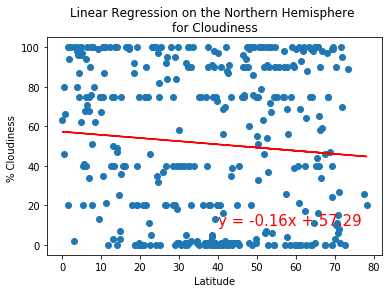

In [65]:
# Linear regression on the Northern Hemisphere cloudliness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 
                       '% Cloudiness ',(40,10))

r-value:-0.16198097054722957


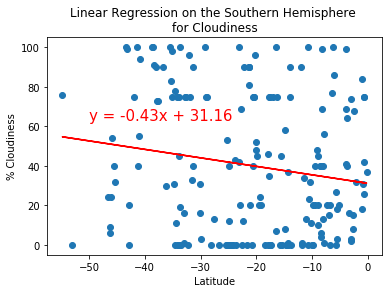

In [66]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness', '% Cloudiness',(-50,63))

r-value:-0.02649712192271246


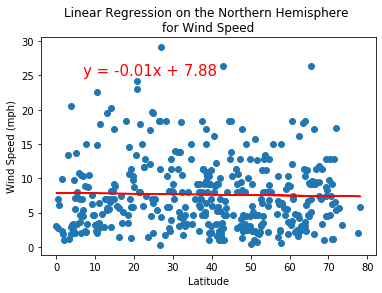

In [72]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(7,25))

r-value:-0.04742426759426111


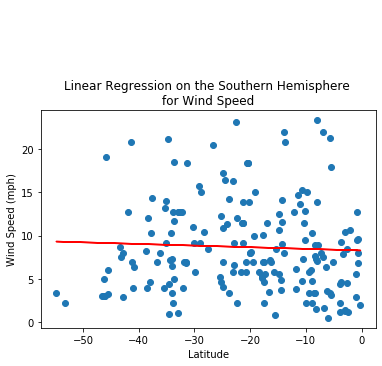

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,35))